1. Рещить задачу классификации ирисов Фишера (Virginica и Sentosa).
2. Определить параметры качества классификации:
- ошибки 1 и 2 рода,
- вероятность правильного распознавания,
- чувствительность и специфичность.
3. Визуализировать обучающую и тестовую выборки данных.
Вариант 1: методом бинарных деревьев

1) Setting all essential libraries and add the dataset 'iris'

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

array_iris = pd.read_csv('/kaggle/input/iris/Iris.csv')
array_iris.drop(array_iris[array_iris['Species'] == "Iris-versicolor"].index, inplace=True) #remove iris-versicolor
array_iris.iloc[:,1:6] #check dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


2) Learning program. Generate the values for further training and improving

In [46]:
# further to split array into random test subsets

# Method by Pandas

Y_col = 'Species'
X_cols = array_iris.iloc[:, 1:5].columns
Y_col, X_cols

iris_train = array_iris.sample(frac=0.8, random_state=1)
iris_test = array_iris.drop(iris_train.index)

x_train = iris_train[X_cols]
x_test = iris_test[X_cols]

y_train = iris_train[Y_col]
y_test = iris_test[Y_col]
print(type(x_train))
x_train.shape, x_test.shape

<class 'pandas.core.frame.DataFrame'>


((80, 4), (20, 4))

3)Increasing objects using the function StandartScaler from the module sklearm

In [47]:
scaler = StandardScaler()
scaler.fit(x_train) # Compute the mean and std to be used for later scaling

# Perform standardization by centering and scaling
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(type(x_train))
x_train.shape

<class 'numpy.ndarray'>


(80, 4)

4) Build test and training plots

In [48]:
import plotly.express as px

set_train = pd.DataFrame(x_train, columns = array_iris.columns[1:5]) # convert to dataframe

fig = px.scatter_matrix(set_train,
    dimensions=["SepalWidthCm", "SepalLengthCm", "PetalWidthCm", "PetalLengthCm"],
title="Scatter matrix of iris train data set")
fig.show()

#--------------------
set_test = pd.DataFrame(x_test, columns = array_iris.columns[1:5])
fig = px.scatter_matrix(set_test,
    dimensions=["SepalWidthCm", "SepalLengthCm", "PetalWidthCm", "PetalLengthCm"],
title="Scatter matrix of iris test data set")
fig.show()

5) Trees model
In the library skleanr there is an implementation of a decision tree which is included in class DecisionThreeClassifier. Using the method 'fit' we will teach our model

In [49]:
trees_model = DecisionTreeClassifier()
# Build a decision tree classifier from the training set (X, y)
trees_model.fit(x_train, y_train)

DecisionTreeClassifier()

The mean score: 100.0 %
Confusion Matrix


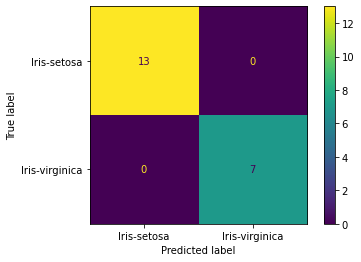

In [50]:
# Predict class or regression value for X test
y_predict = trees_model.predict(x_test)

#
confusion_m = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = trees_model.classes_)
disp.plot()

# Return the mean accuracy on the given test data and labels
print(f'The mean score: {trees_model.score(x_test, y_test) * 100} %') 
print("Confusion Matrix")
plt.show()

6) In a result, we've got values sensitivity and specificity for solution

In [51]:
sensitivity = confusion_m[0,0]/(confusion_m[0,0] + confusion_m[0,1])
print(f'Sensitivity value = {sensitivity}')

specificity = confusion_m[1,1]/(confusion_m[1,0] + confusion_m[1,1])
print(f'Specificity value  = {specificity}')

Sensitivity value = 1.0
Specificity value  = 1.0


# %% [code]